# Seaborn Fundamentals

This notebook introduces Seaborn and shows the most useful plots and workflows for data analysis.


## 1. Introduction
**What is Seaborn?** A high‑level statistical visualization library built on top of Matplotlib and designed to work seamlessly with pandas DataFrames.

**Install / import:**
```
pip install seaborn
```


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


## 2. Loading Data
Use built‑in sample datasets with `sns.load_dataset()` and load external CSVs with pandas.


In [6]:
# Built‑in dataset
penguins = pd.read_csv("penguins.csv")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
# External CSV example (using pandas then seaborn)
from pathlib import Path

csv_path = Path("seaborn_sample.csv")

tmp = pd.DataFrame({
    "x": np.arange(10),
    "y": np.random.randn(10),
    "group": ["A"] * 5 + ["B"] * 5
})

tmp.to_csv(csv_path, index=False)

external = pd.read_csv(csv_path)
external.head()


,x,y,group
0,0,-0.509589,A
1,1,1.386618,A
2,2,-0.644821,A
3,3,1.060854,A
4,4,0.149730,A


## 3. Plotting Basics
Set styles and contexts, then create simple plots.


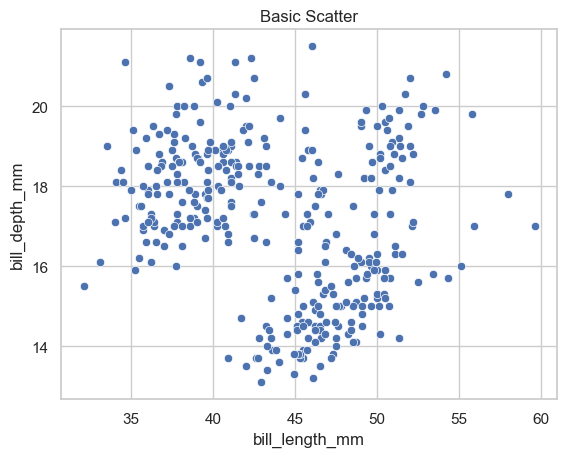

In [10]:
sns.set_theme(style="whitegrid", context="notebook")

sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
plt.title("Basic Scatter")
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.show()


## 4. Relational Plots
`scatterplot()`, `lineplot()`, and `relplot()` with `hue`, `style`, and `size`.


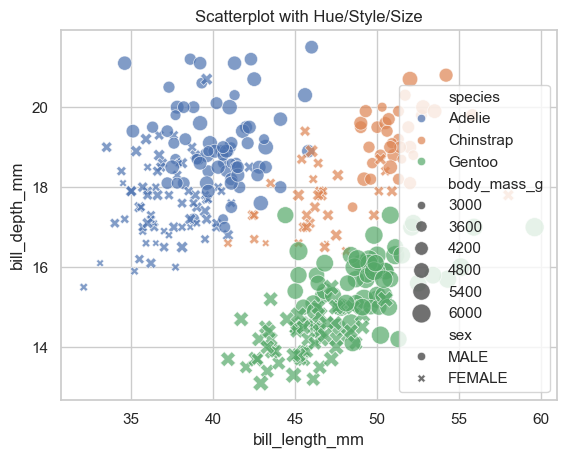

In [12]:
sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="sex",
    size="body_mass_g",
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Scatterplot with Hue/Style/Size")
plt.show()


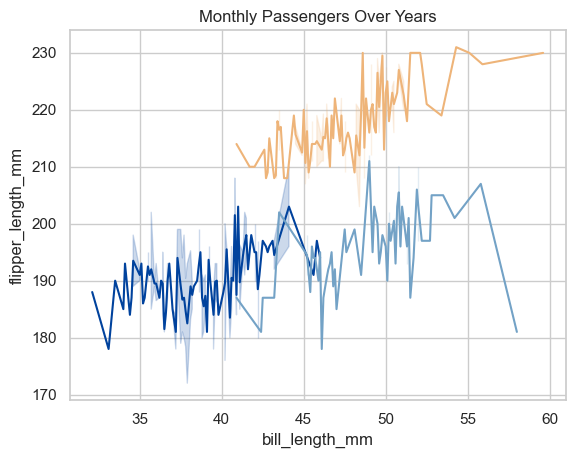

In [44]:
# Lineplot example
sns.lineplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species", legend=False)
plt.title("Monthly Passengers Over Years")
plt.show()


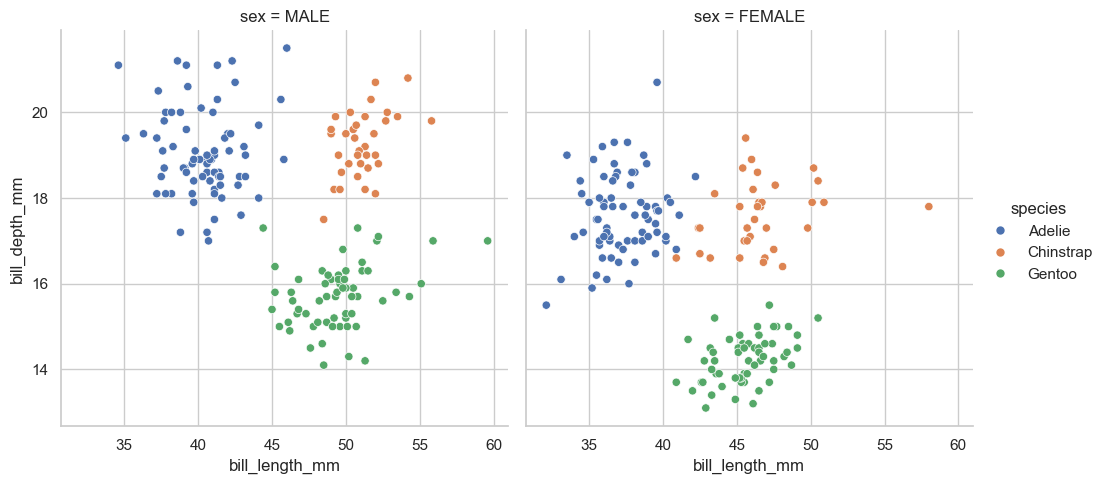

In [14]:
# relplot (figure‑level, multi‑subplot)
sns.relplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    col="sex"
)
plt.show()


## 5. Distribution Plots
Histograms and KDE with `histplot()` and `kdeplot()`. Use `displot()` for figure‑level distribution plots.


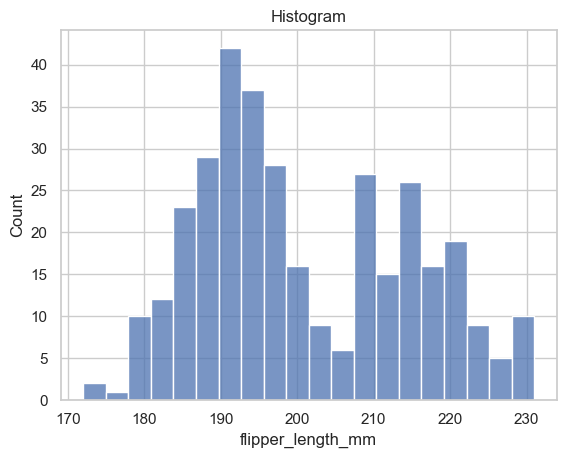

In [15]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=20)
plt.title("Histogram")
plt.show()


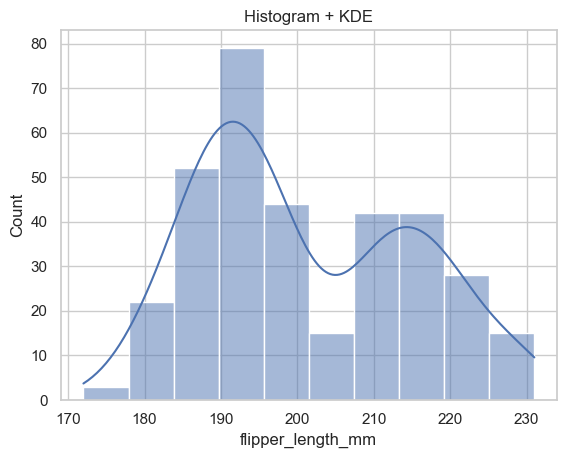

In [16]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)
plt.title("Histogram + KDE")
plt.show()


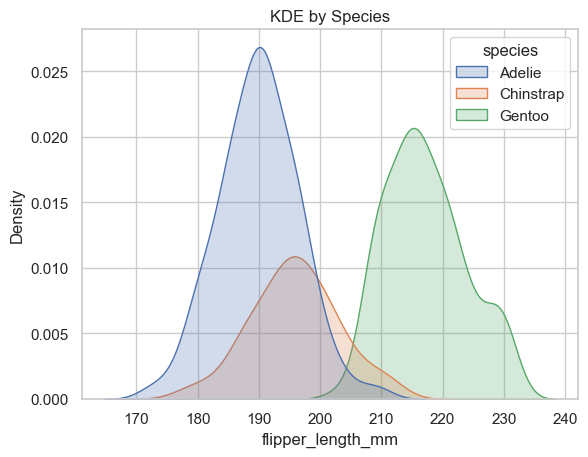

In [17]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", fill=True)
plt.title("KDE by Species")
plt.show()


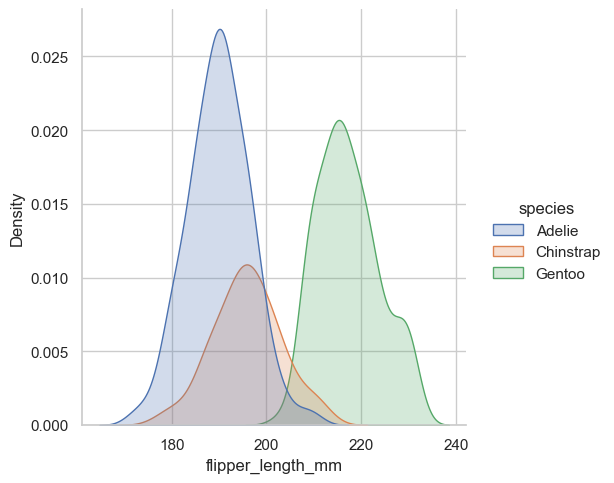

In [18]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)
plt.show()


## 6. Categorical Plots
Boxplot, violinplot, barplot, countplot, stripplot, swarmplot, and `catplot()`.


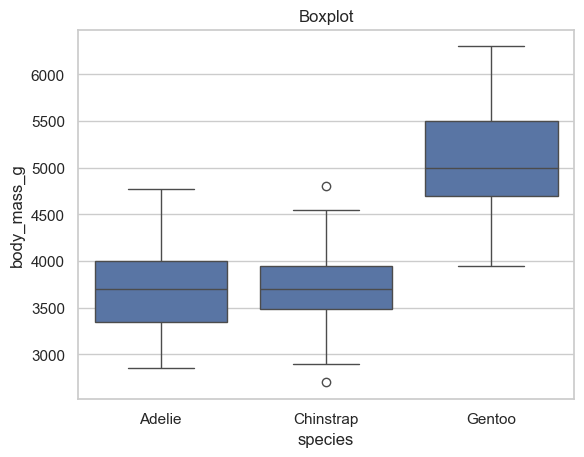

In [19]:
sns.boxplot(data=penguins, x="species", y="body_mass_g")
plt.title("Boxplot")
plt.show()


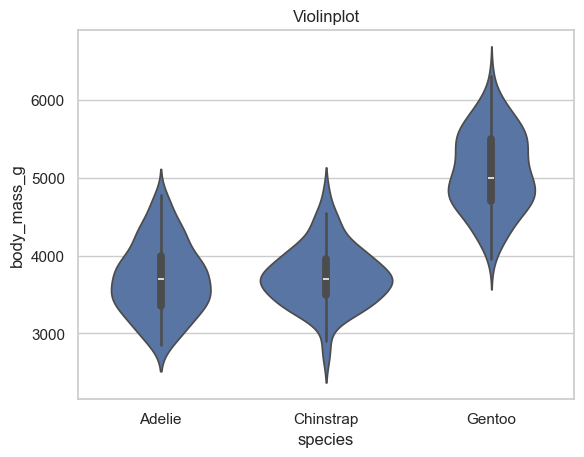

In [20]:
sns.violinplot(data=penguins, x="species", y="body_mass_g")
plt.title("Violinplot")
plt.show()


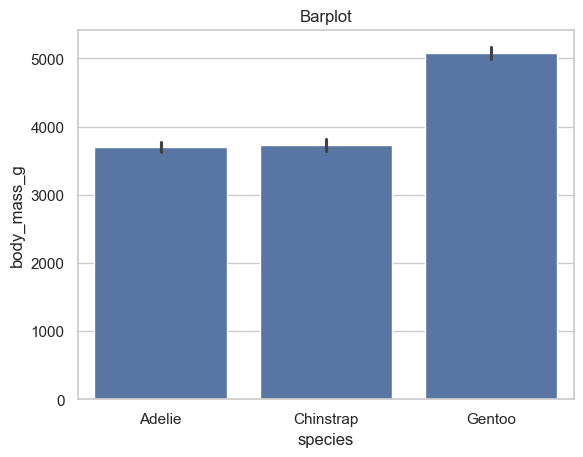

In [21]:
sns.barplot(data=penguins, x="species", y="body_mass_g")
plt.title("Barplot")
plt.show()


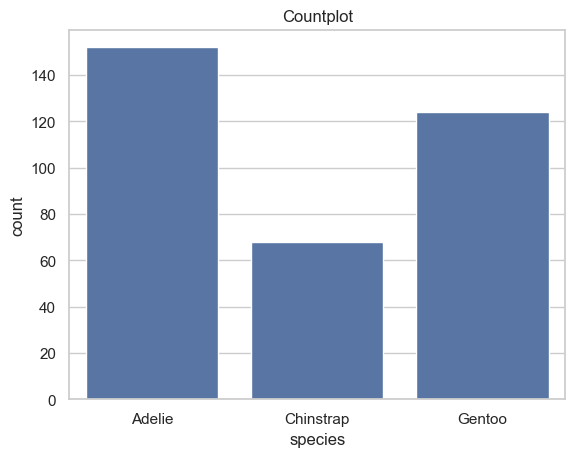

In [22]:
sns.countplot(data=penguins, x="species")
plt.title("Countplot")
plt.show()


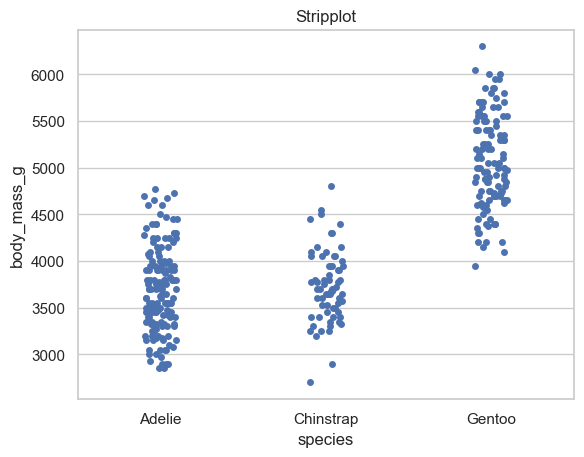

In [23]:
sns.stripplot(data=penguins, x="species", y="body_mass_g", jitter=True)
plt.title("Stripplot")
plt.show()


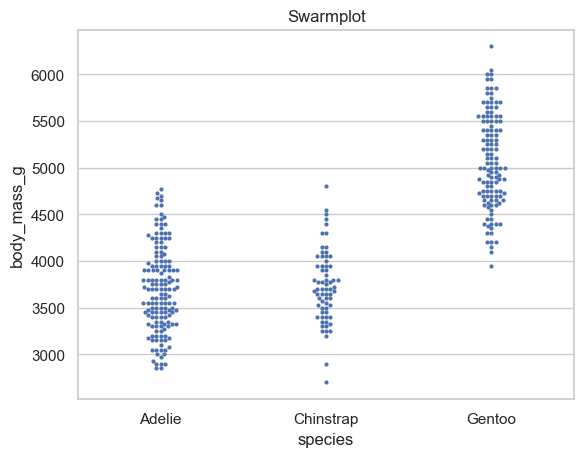

In [24]:
sns.swarmplot(data=penguins, x="species", y="body_mass_g", size=3)
plt.title("Swarmplot")
plt.show()


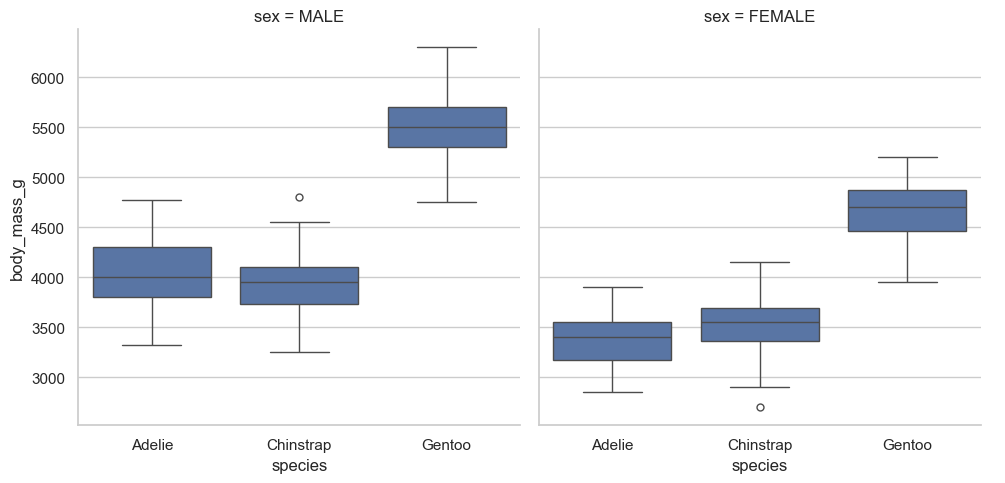

In [25]:
sns.catplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    col="sex",
    kind="box"
)
plt.show()


## 7. Matrix & Multivariate Plots
Heatmaps, pairplots, correlation plots, and joint plots.


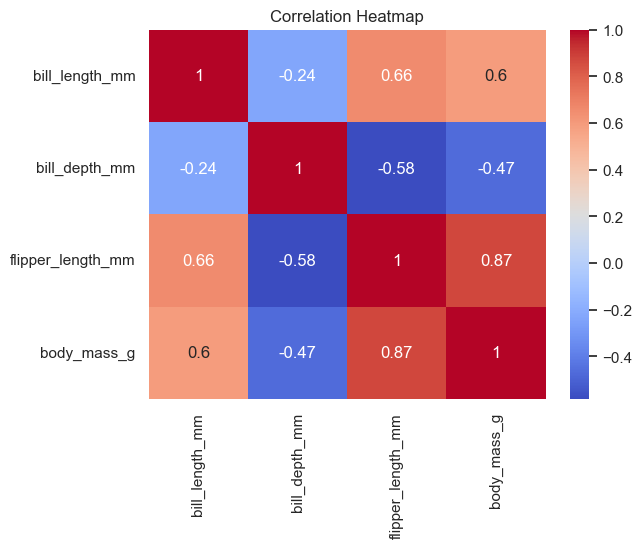

In [26]:
# Heatmap from correlation matrix
corr = penguins.select_dtypes(include="number").corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


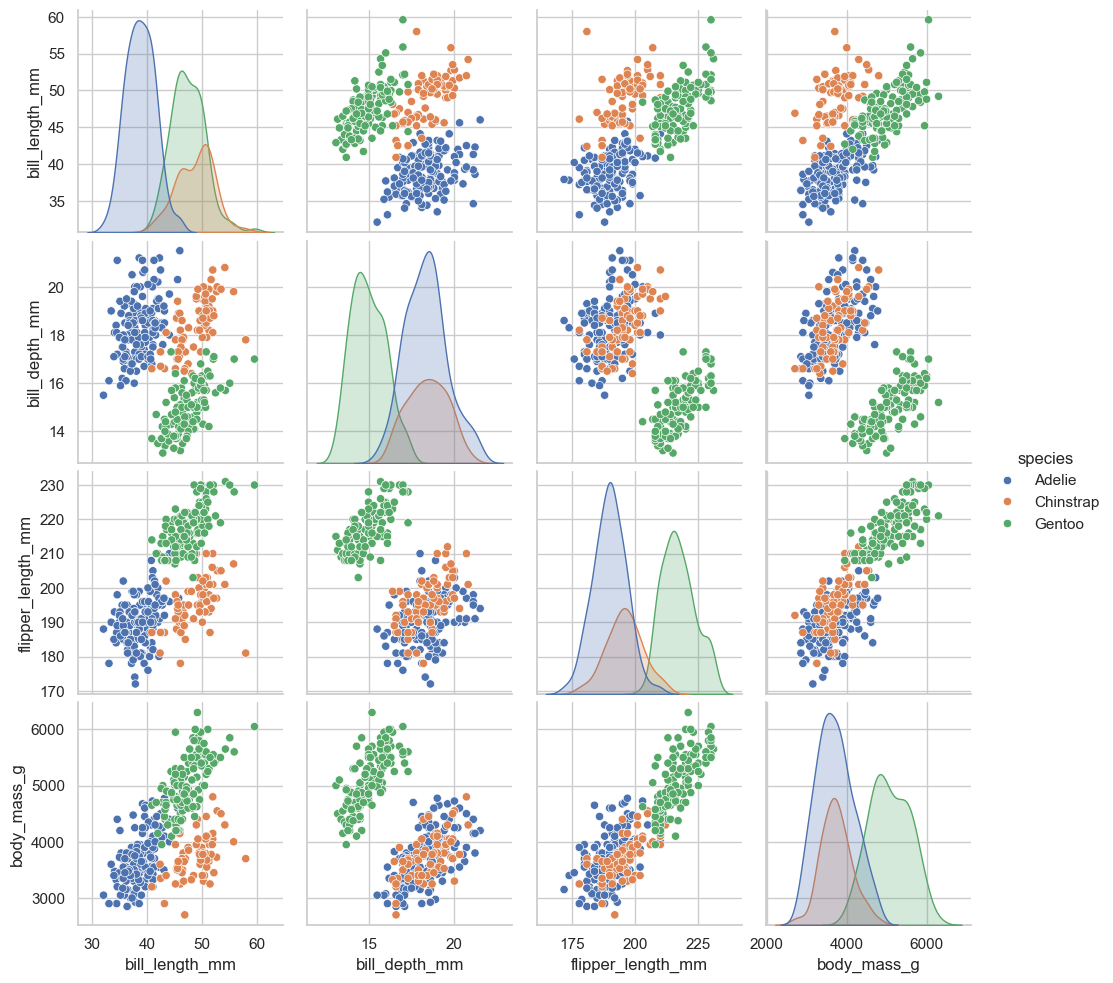

In [27]:
sns.pairplot(penguins, hue="species")
plt.show()


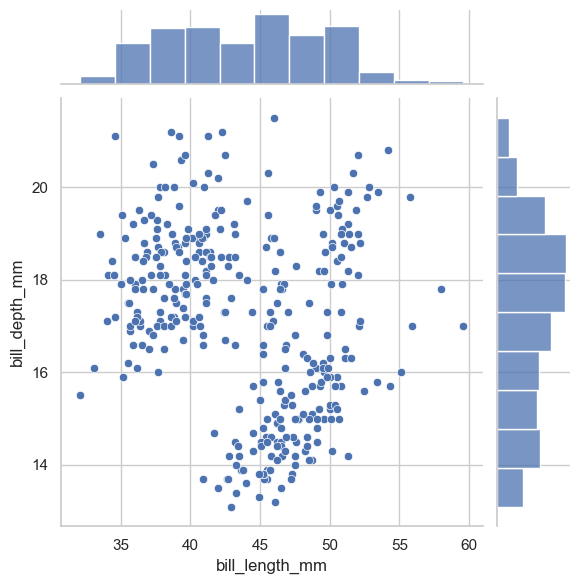

In [28]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="scatter")
plt.show()


## 8. Regression & Linear Models
`lmplot()` and `regplot()` with regression lines and residuals.


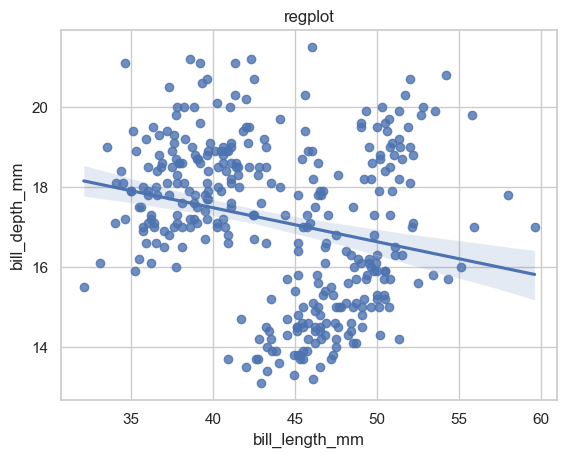

In [29]:
sns.regplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
plt.title("regplot")
plt.show()


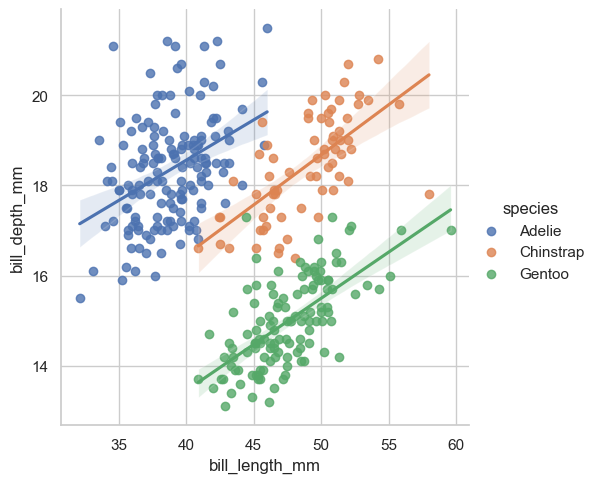

In [30]:
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.show()


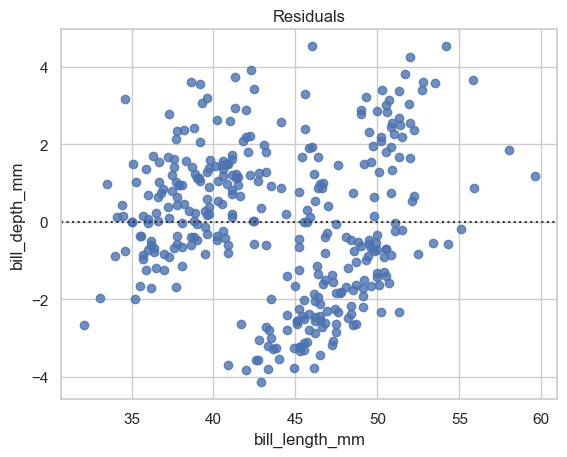

In [31]:
# Residuals plot
sns.residplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
plt.title("Residuals")
plt.show()


## 9. Advanced Figure Layouts
FacetGrid basics and slicing by categories using `row` and `col`.


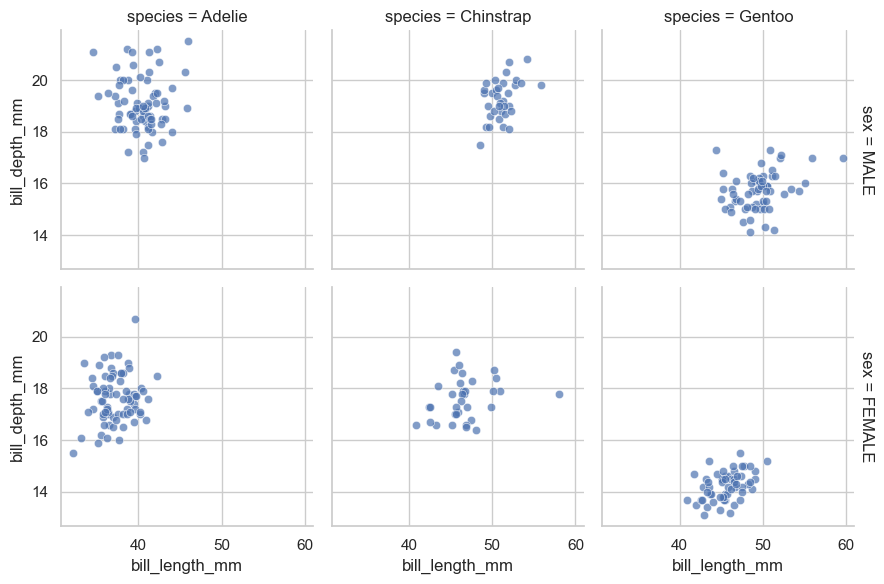

In [32]:
g = sns.FacetGrid(penguins, col="species", row="sex", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="bill_length_mm", y="bill_depth_mm", alpha=0.7)

g.set_axis_labels("bill_length_mm", "bill_depth_mm")
plt.show()


## 10. Color Palettes & Styles
Built‑in palettes, custom palettes, and applying them.


In [33]:
sns.color_palette("deep")


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

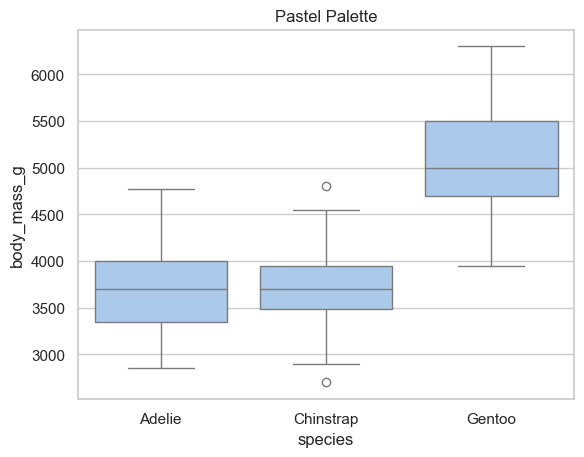

In [34]:
sns.set_palette("pastel")

sns.boxplot(data=penguins, x="species", y="body_mass_g")
plt.title("Pastel Palette")
plt.show()


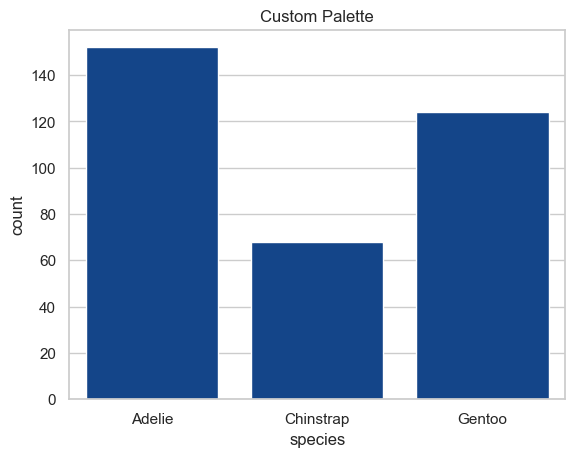

In [35]:
custom = ["#00429d", "#73a2c6", "#eeb479"]
sns.set_palette(custom)

sns.countplot(data=penguins, x="species")
plt.title("Custom Palette")
plt.show()


## 11. Seaborn with Pandas
Passing DataFrame columns by name and combining seaborn with pandas operations.


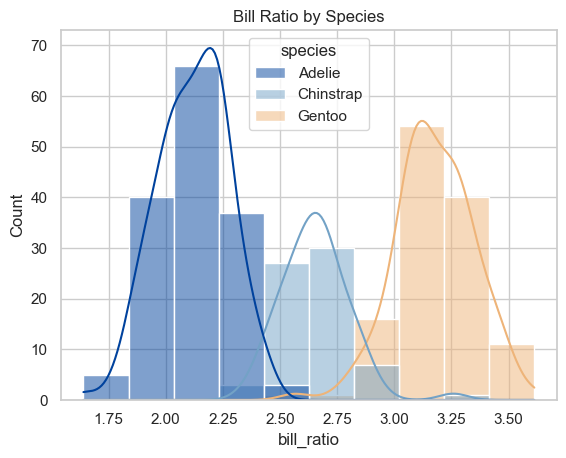

In [36]:
summary = (
    penguins
    .dropna(subset=["bill_length_mm", "bill_depth_mm"])
    .assign(bill_ratio=lambda d: d["bill_length_mm"] / d["bill_depth_mm"])
)

sns.histplot(data=summary, x="bill_ratio", hue="species", kde=True)
plt.title("Bill Ratio by Species")
plt.show()


## 12. Seaborn Objects Interface
Intro to the modern `seaborn.objects` API.


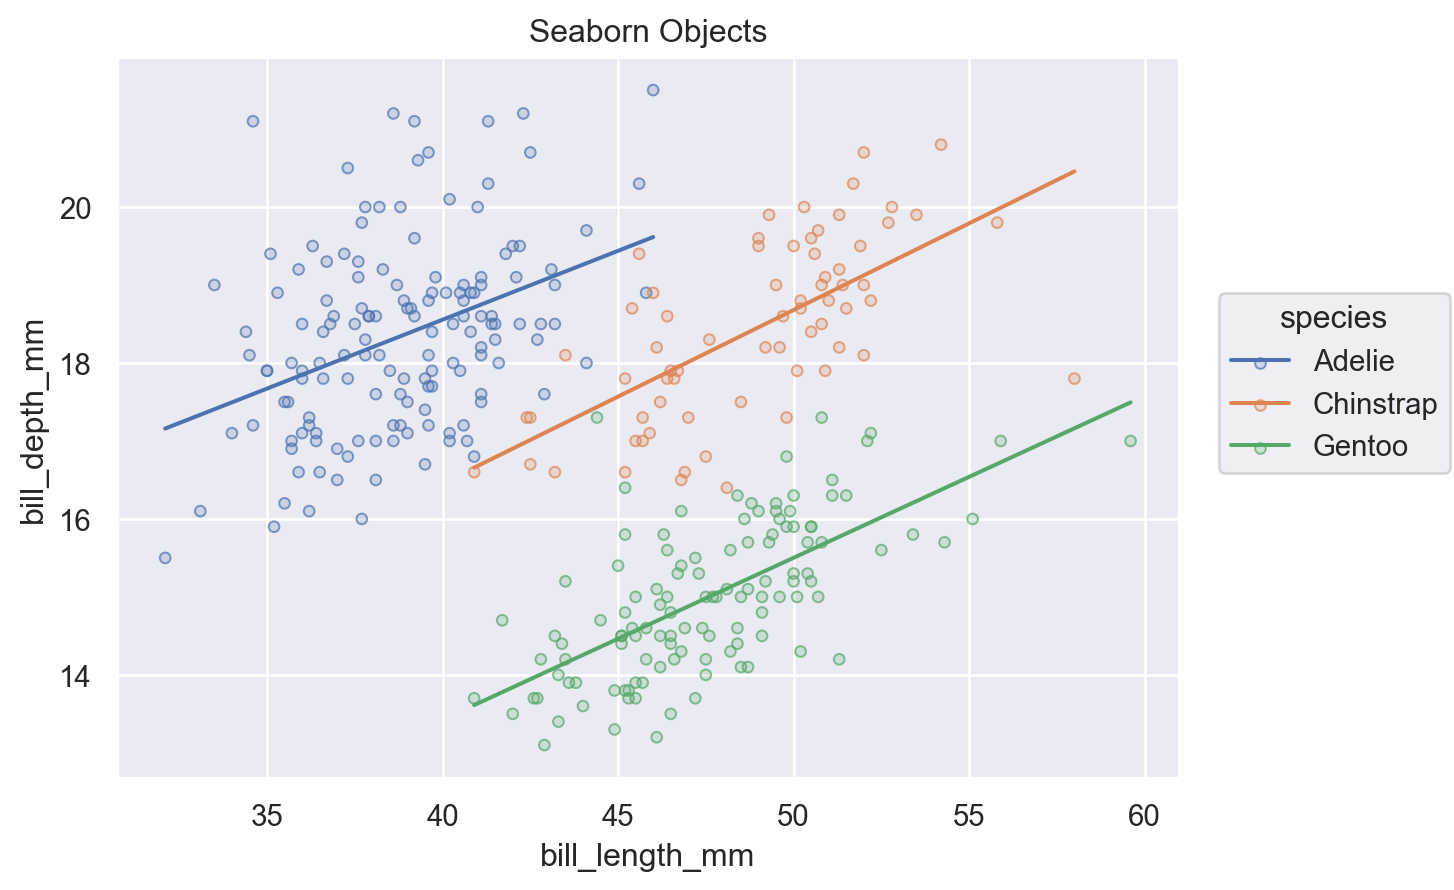

In [37]:
import seaborn.objects as so

(
    so.Plot(penguins.dropna(), x="bill_length_mm", y="bill_depth_mm", color="species")
    .add(so.Dots(alpha=0.7))
    .add(so.Line(), so.PolyFit(order=1))
    .label(title="Seaborn Objects", x="bill_length_mm", y="bill_depth_mm")
)


## 13. Putting It All Together
End‑to‑end mini workflow with data prep, visualization, and saving figures.


In [38]:
# 1) Clean and summarize
peng = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm", "species"])

summary = peng.groupby("species").agg(
    bill_len_mean=("bill_length_mm", "mean"),
    bill_depth_mean=("bill_depth_mm", "mean"),
    count=("species", "size")
).reset_index()

summary


,species,bill_len_mean,bill_depth_mean,count
0,Adelie,38.791391,18.346358,151
1,Chinstrap,48.833824,18.420588,68
2,Gentoo,47.504878,14.982114,123


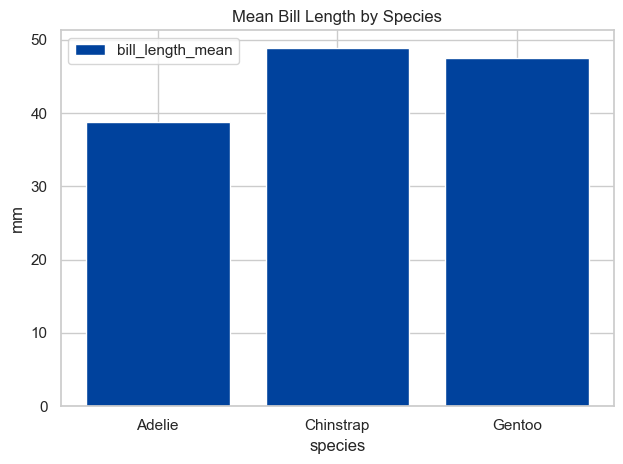

In [39]:
# 2) Plot summary
fig, ax = plt.subplots()
ax.bar(summary["species"], summary["bill_len_mean"], label="bill_length_mean")
ax.set_title("Mean Bill Length by Species")
ax.set_xlabel("species")
ax.set_ylabel("mm")
ax.legend()
plt.tight_layout()
plt.savefig("seaborn_summary_bar.png")
plt.show()


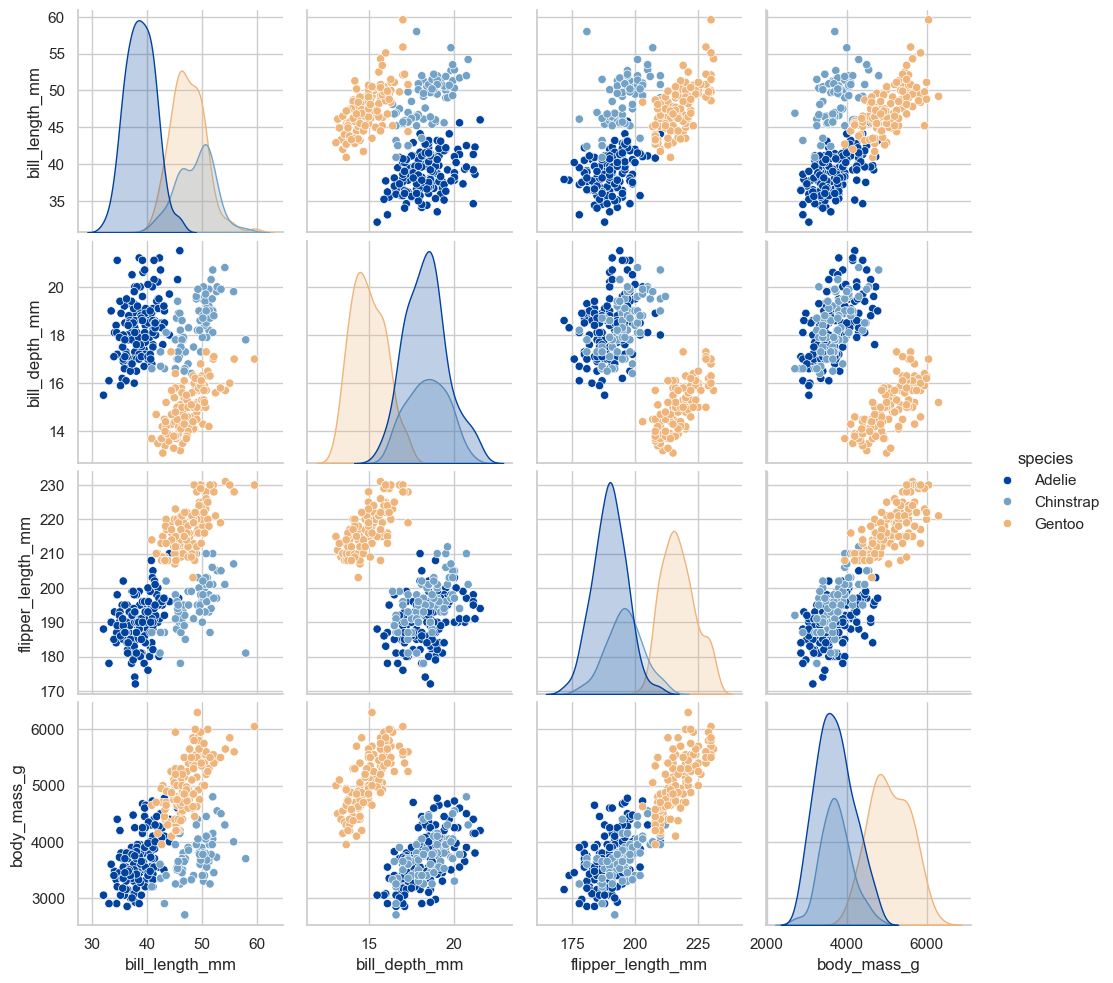

In [40]:
# 3) Pairplot for multivariate overview
sns.pairplot(peng, hue="species")
plt.show()
